In [6]:
import pandas as pd
import numpy as np

# Rastgele bir veri seti oluşturmak
np.random.seed(0)

data = {
    'CRIM': np.random.rand(100) * 10,  # Suç oranı
    'ZN': np.random.randint(0, 100, 100),  # Konut arsası oranı
    'INDUS': np.random.rand(100) * 20,  # İş arazisi oranı
    'CHAS': np.random.choice([0, 1], 100),  # Charles Nehri (1 = sınır, 0 = değil)
    'NOX': np.random.rand(100) * 0.5,  # Nitrat oksit konsantrasyonu
    'RM': np.random.rand(100) * 3 + 4,  # Ortalama oda sayısı
    'AGE': np.random.randint(0, 100, 100),  # 1940 öncesi inşa edilen konut oranı
    'DIS': np.random.rand(100) * 12,  # İstihdam merkezlerine mesafe
    'RAD': np.random.randint(1, 10, 100),  # Yollar erişilebilirlik indeksi
    'TAX': np.random.randint(100, 700, 100),  # Vergi oranı
    'PTRATIO': np.random.rand(100) * 10 + 10,  # Öğrenci-öğretmen oranı
    'LSTAT': np.random.rand(100) * 30,  # Düşük gelir grubu yüzdesi
    'MEDV': np.random.rand(100) * 50 + 5  # Konutların medyan değeri
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Veri setini incelemek için ilk 5 satırı gösterme
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,5.488135,2,0.234282,0,0.210270,4.393166,97,7.933410,8,120,13.396310,13.769096,5.567756
1,7.151894,3,7.199561,0,0.278684,4.036109,12,5.283165,4,420,16.002129,9.670006,30.561089
2,6.027634,94,14.599811,0,0.430276,4.346453,15,0.917841,3,336,19.631973,9.495022,9.164549
3,5.448832,98,3.432594,0,0.363522,5.855441,33,8.357558,6,179,11.478013,14.477527,7.553774
4,4.236548,13,10.420732,1,0.135164,6.922769,23,2.968785,8,174,12.569166,21.894829,53.275832


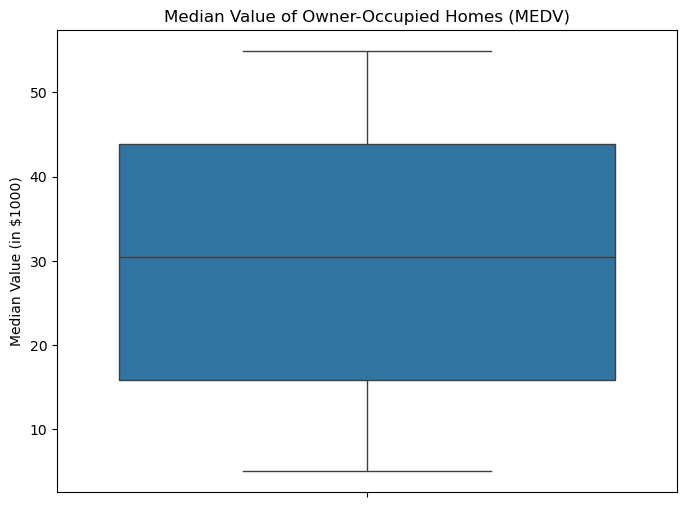

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# MEDV değişkeni için kutu grafiği
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='MEDV')
plt.title('Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000)')
plt.show()


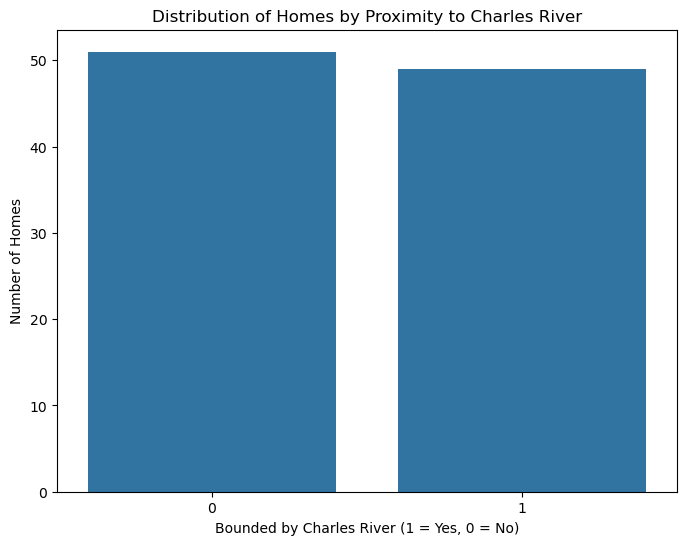

In [11]:
# CHAS değişkeni için çubuk grafiği
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CHAS')
plt.title('Distribution of Homes by Proximity to Charles River')
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
plt.ylabel('Number of Homes')
plt.show()


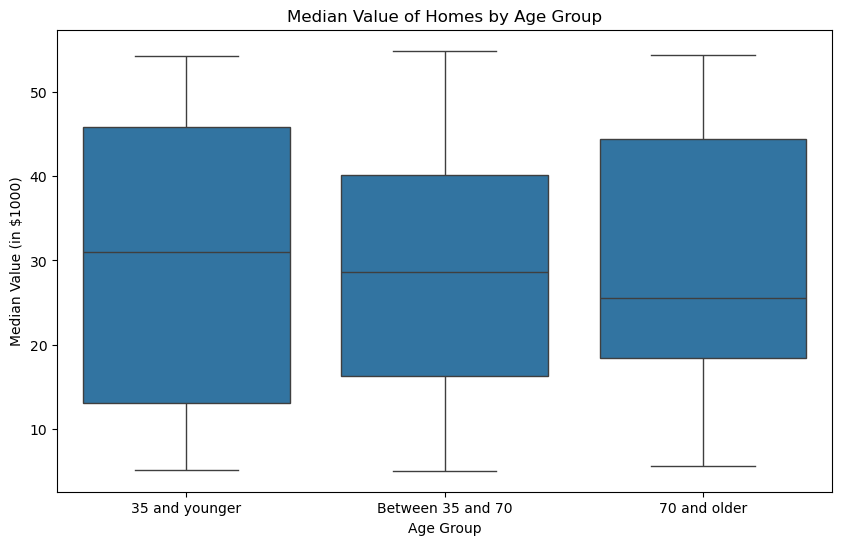

In [13]:
# AGE değişkenini üç gruba ayırma
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', 'Between 35 and 70', '70 and older'])

# AGE gruplarına göre MEDV için kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AGE_Group', y='MEDV')
plt.title('Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000)')
plt.show()


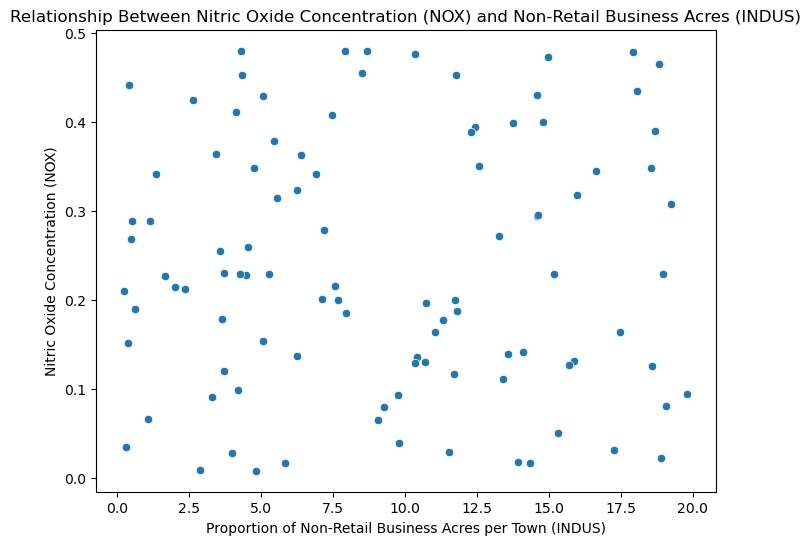

In [15]:
# NOX ve INDUS arasındaki ilişki için dağılım grafiği
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='INDUS', y='NOX')
plt.title('Relationship Between Nitric Oxide Concentration (NOX) and Non-Retail Business Acres (INDUS)')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


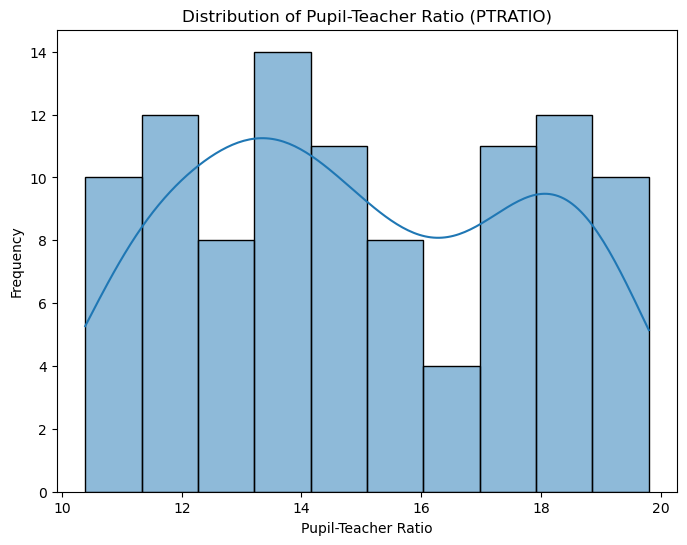

In [17]:
# PTRATIO değişkeni için histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PTRATIO', bins=10, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [19]:
from scipy.stats import ttest_1samp

# Tek örneklem t-testi
t_stat, p_value = ttest_1samp(df['MEDV'], 30)

print("t-İstatistiği:", t_stat)
print("p-Değeri:", p_value)


t-İstatistiği: -0.1566425412824903
p-Değeri: 0.8758455721138485


In [23]:
from scipy.stats import ttest_ind

# İki örneklem t-testi
t_stat, p_value = ttest_ind(chas_1, chas_0)

print("t-İstatistiği:", t_stat)
print("p-Değeri:", p_value)


t-İstatistiği: -0.8725169705108704
p-Değeri: 0.3850591761105866


In [25]:
from scipy.stats import pearsonr

# Pearson korelasyon testi
corr_coefficient, p_value = pearsonr(df['NOX'], df['INDUS'])

print("Korelasyon Katsayısı:", corr_coefficient)
print("p-Değeri:", p_value)


Korelasyon Katsayısı: 0.009996886832430156
p-Değeri: 0.9213649830156585


In [27]:
# PTRATIO ve MEDV arasındaki korelasyon testi
corr_coefficient, p_value = pearsonr(df['PTRATIO'], df['MEDV'])

print("Korelasyon Katsayısı:", corr_coefficient)
print("p-Değeri:", p_value)


Korelasyon Katsayısı: -0.010412245923161055
p-Değeri: 0.9181088828194629
